# Trajectory Visualization by MMSI
Visualize each vessel's trajectory individually from the data_AIS_Custom_01062021_30112021 file

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Load the specific data file
data_dir = "./dataset/danish_waters"
file_path = os.path.join(data_dir, "data_AIS_Custom_01062021_30112021_CarFisHigMilPasPleSaiTan_600_99999999_0.pkl")
file_path = os.path.join(data_dir, "data_AIS_Custom_01062021_30112021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl")

# Load pickle file
data = pd.read_pickle(file_path)

# Convert to DataFrame if it's a dict
if isinstance(data, dict):
    # Extract arrays from dictionary
    mmsi = data.get('mmsi', 0)
    shiptype = data.get('shiptype', 0)
    
    lats = data['lat'] if isinstance(data['lat'], (list, np.ndarray)) else [data['lat']]
    lons = data['lon'] if isinstance(data['lon'], (list, np.ndarray)) else [data['lon']]
    speeds = data['speed'] if isinstance(data['speed'], (list, np.ndarray)) else [data['speed']]
    courses = data['course'] if isinstance(data['course'], (list, np.ndarray)) else [data['course']]
    timestamps = data['timestamp'] if isinstance(data['timestamp'], (list, np.ndarray)) else [data['timestamp']]
    
    df = pd.DataFrame({
        'mmsi': mmsi,
        'shiptype': shiptype,
        'lat': lats,
        'lon': lons,
        'speed': speeds,
        'course': courses,
        'timestamp': timestamps
    })
elif isinstance(data, pd.DataFrame):
    df = data
else:
    df = pd.DataFrame(data)

df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.sort_values('datetime').reset_index(drop=True)

print(f"Loaded data shape: {df.shape}")
print(f"Unique MMSI values: {df['mmsi'].nunique()}")
print(f"MMSI values: {df['mmsi'].unique()}")
print(f"\nDate range: {df['datetime'].min()} to {df['datetime'].max()}")

Loaded data shape: (45, 8)
Unique MMSI values: 1
MMSI values: [0]

Date range: 2021-07-19 07:51:37 to 2021-07-19 09:19:37


In [15]:
data

{'mmsi': 0,
 'shiptype': 36,
 'track_length': 45,
 'lat': [55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146145,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142,
  55.146142],
 'lon': [15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110447,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,
  15.110402,

In [16]:
df.describe()

,mmsi,shiptype,lat,lon,speed,course,timestamp,datetime
count,45.0,45.0,45.000000,45.000000,45.0,45.0,4.500000e+01,45
mean,0.0,36.0,55.146143,15.110412,0.0,0.0,1.626684e+09,2021-07-19 08:35:37
min,0.0,36.0,55.146142,15.110402,0.0,0.0,1.626681e+09,2021-07-19 07:51:37
25%,0.0,36.0,55.146142,15.110402,0.0,0.0,1.626682e+09,2021-07-19 08:13:37
50%,0.0,36.0,55.146142,15.110402,0.0,0.0,1.626684e+09,2021-07-19 08:35:37
75%,0.0,36.0,55.146142,15.110402,0.0,0.0,1.626685e+09,2021-07-19 08:57:37
max,0.0,36.0,55.146145,15.110447,0.0,0.0,1.626686e+09,2021-07-19 09:19:37
std,0.0,0.0,0.000001,0.000019,0.0,0.0,1.576071e+03,NaN


In [17]:
df.head()

,mmsi,shiptype,lat,lon,speed,course,timestamp,datetime
0,0,36,55.146145,15.110447,0.0,0.0,1.626681e+09,2021-07-19 07:51:37
1,0,36,55.146145,15.110447,0.0,0.0,1.626681e+09,2021-07-19 07:53:37
2,0,36,55.146145,15.110447,0.0,0.0,1.626681e+09,2021-07-19 07:55:37
3,0,36,55.146145,15.110447,0.0,0.0,1.626681e+09,2021-07-19 07:57:37
4,0,36,55.146145,15.110447,0.0,0.0,1.626682e+09,2021-07-19 07:59:37


In [18]:
# unique shiptype in df
df["shiptype"].unique(), df["shiptype"].value_counts()

(array([36], dtype=int64),
 shiptype
 36    45
 Name: count, dtype: int64)

In [19]:
len(df)

45

In [20]:
# Quick diagnostics: are speed/course all zeros?
print("Speed value counts (top 10):")
print(df['speed'].value_counts().head(10))
print("\nCourse value counts (top 10):")
print(df['course'].value_counts().head(10))
print("\nSpeed summary:")
print(df['speed'].describe())
print("\nCourse summary:")
print(df['course'].describe())
print("\nNon-zero speeds:", (df['speed'] != 0).sum())
print("Non-zero courses:", (df['course'] != 0).sum())
print("\nDistinct (mmsi, shiptype):")
print(df[['mmsi','shiptype']].drop_duplicates().head(10))

Speed value counts (top 10):
speed
0.0    45
Name: count, dtype: int64

Course value counts (top 10):
course
0.0    45
Name: count, dtype: int64

Speed summary:
count    45.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: speed, dtype: float64

Course summary:
count    45.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: course, dtype: float64

Non-zero speeds: 0
Non-zero courses: 0

Distinct (mmsi, shiptype):
   mmsi  shiptype
0     0        36


Visualizing 1 vessel(s)...


Vessel 1/1: MMSI 0 (Ship Type: 36)
Records: 45
Date range: 2021-07-19 07:51:37 to 2021-07-19 09:19:37
Lat range: 55.1461° to 55.1461°
Lon range: 15.1104° to 15.1104°
Speed: min=0.00, max=0.00, avg=0.00 knots


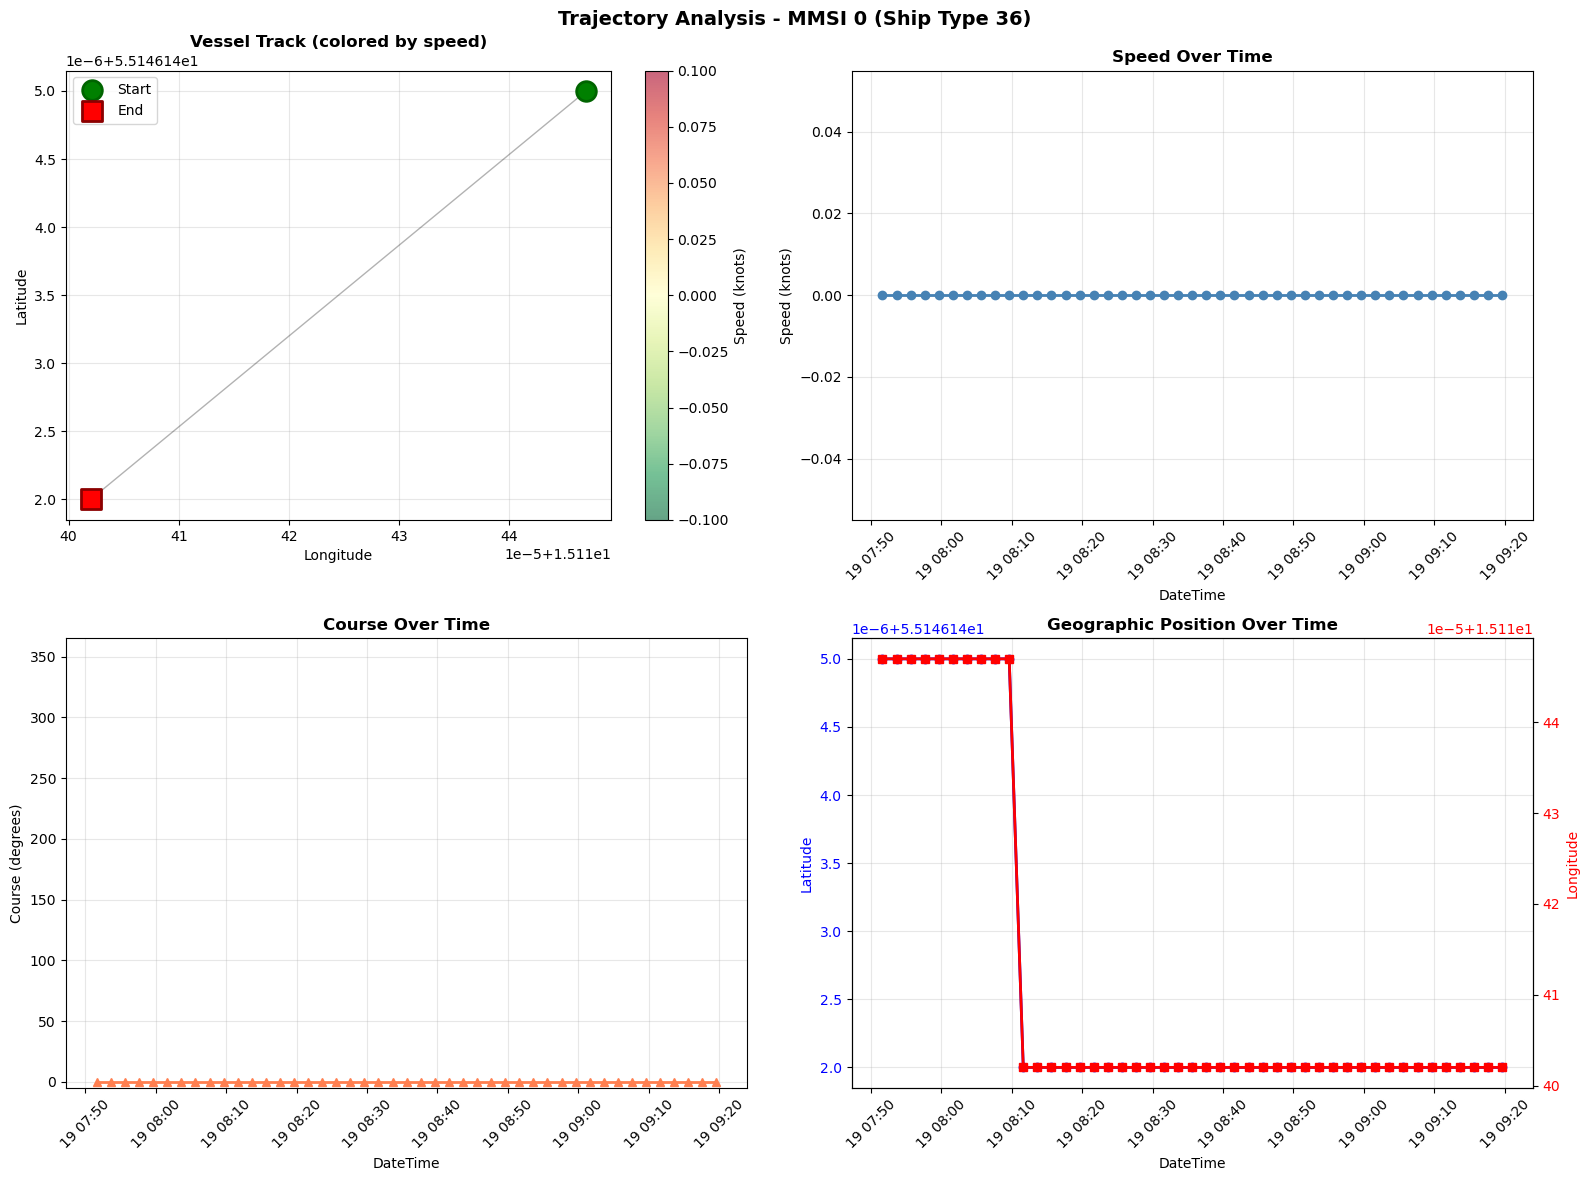

Visualization complete for MMSI 0


In [21]:
# Get unique MMSI values
unique_mmsis = df['mmsi'].unique()
print(f"Visualizing {len(unique_mmsis)} vessel(s)...\n")

# Create trajectory visualization for each MMSI
for idx, mmsi_val in enumerate(unique_mmsis, 1):
    vessel_data = df[df['mmsi'] == mmsi_val].sort_values('datetime').reset_index(drop=True)
    shiptype_val = vessel_data['shiptype'].iloc[0]
    
    print(f"\n{'='*70}")
    print(f"Vessel {idx}/{len(unique_mmsis)}: MMSI {mmsi_val} (Ship Type: {shiptype_val})")
    print(f"{'='*70}")
    print(f"Records: {len(vessel_data)}")
    print(f"Date range: {vessel_data['datetime'].min()} to {vessel_data['datetime'].max()}")
    print(f"Lat range: {vessel_data['lat'].min():.4f}° to {vessel_data['lat'].max():.4f}°")
    print(f"Lon range: {vessel_data['lon'].min():.4f}° to {vessel_data['lon'].max():.4f}°")
    print(f"Speed: min={vessel_data['speed'].min():.2f}, max={vessel_data['speed'].max():.2f}, avg={vessel_data['speed'].mean():.2f} knots")
    
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Trajectory Analysis - MMSI {mmsi_val} (Ship Type {shiptype_val})', 
                 fontsize=14, fontweight='bold')
    
    # 1. Map trajectory with color gradient by speed
    ax = axes[0, 0]
    scatter = ax.scatter(vessel_data['lon'], vessel_data['lat'], 
                        c=vessel_data['speed'], cmap='RdYlGn_r', 
                        s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    ax.plot(vessel_data['lon'], vessel_data['lat'], 'k-', alpha=0.3, linewidth=1)
    ax.scatter(vessel_data['lon'].iloc[0], vessel_data['lat'].iloc[0], 
              color='green', s=200, marker='o', label='Start', zorder=5, edgecolors='darkgreen', linewidth=2)
    ax.scatter(vessel_data['lon'].iloc[-1], vessel_data['lat'].iloc[-1], 
              color='red', s=200, marker='s', label='End', zorder=5, edgecolors='darkred', linewidth=2)
    ax.set_title('Vessel Track (colored by speed)', fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True, alpha=0.3)
    ax.legend()
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Speed (knots)')
    
    # 2. Speed over time
    ax = axes[0, 1]
    ax.plot(vessel_data['datetime'], vessel_data['speed'], marker='o', color='steelblue', linewidth=2)
    ax.fill_between(vessel_data['datetime'], vessel_data['speed'], alpha=0.3, color='steelblue')
    ax.set_title('Speed Over Time', fontweight='bold')
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Speed (knots)')
    ax.grid(True, alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    # 3. Course over time
    ax = axes[1, 0]
    ax.plot(vessel_data['datetime'], vessel_data['course'], marker='^', color='coral', linewidth=2)
    ax.set_title('Course Over Time', fontweight='bold')
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Course (degrees)')
    ax.set_ylim(-5, 365)
    ax.grid(True, alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    # 4. Lat/Lon progression
    ax = axes[1, 1]
    ax.plot(vessel_data['datetime'], vessel_data['lat'], marker='o', label='Latitude', color='blue', linewidth=2)
    ax2 = ax.twinx()
    ax2.plot(vessel_data['datetime'], vessel_data['lon'], marker='s', label='Longitude', color='red', linewidth=2)
    ax.set_title('Geographic Position Over Time', fontweight='bold')
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Latitude', color='blue')
    ax2.set_ylabel('Longitude', color='red')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.grid(True, alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Visualization complete for MMSI {mmsi_val}")